# PREDICTING THE HOUSE PRICES WITH THE POLYNOMIAL LINEAR REGRESSION MACHINE MODEL

DATASET SOURCE : "UCI-MACHINE LEARNING REPOSITRY OR SKLEARN"

##           IMPORTING THE LIBRARIES 

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


##           IMPORTING THE DATASET

In [121]:
from sklearn import datasets
boston = datasets.load_boston()
dataset = pd.DataFrame(boston.data,columns=boston.feature_names)

Format

The original data are 506 observations on 14 variables, medv being the target variable:
  1. crim 	=per capita crime rate by town
  2.  zn 	=proportion of residential land zoned for lots over 25,000 sq.ft
  3. indus 	=proportion of non-retail business acres per town
  4. chas 	=Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
  5. nox 	=nitric oxides concentration (parts per 10 million)
  6. rm 	=average number of rooms per dwelling
  7. age 	=proportion of owner-occupied units built prior to 1940   
  8. dis 	=weighted distances to five Boston employment centres
  9. rad 	=index of accessibility to radial highways
  10. tax 	=full-value property-tax rate per USD 10,000
  11. ptratio 	=pupil-teacher ratio by town
  12. b 	=1000(B - 0.63)^2 where B is the proportion of blacks by town
  13. lstat 	=percentage of lower status of the population
  14. medv 	=median value of owner-occupied homes in USD 1000's 

In [122]:
dataset = pd.concat([dataset,pd.Series(boston.target,name='MEDV')],axis=1)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## SPLITTING THE DATSET TO DEPENDENT AND INDEPENDENT 

In [123]:
X=dataset.iloc[:,12].values
y=dataset.iloc[:,13].values
X=X.reshape(-1,1)

# Model creation

In [171]:
# We will create a function which can call the model by taking the Degree as the input variable
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
def polreg(Degree):
    regpoly=PolynomialFeatures(degree=Degree)
    X_poly=regpoly.fit_transform(X)
    reg=LinearRegression().fit(X_poly,y)
    plt.scatter(X,y,color="blue")
    plt.plot(X,reg.predict(X_poly),color="red")    
    plt.xlabel("LSTAT Data")
    plt.ylabel("Predicted Price")
    plt.title("LSAT VS PRICE IN BOSTON ")


# VISUALISING THE POLYNOMIAL MODEL

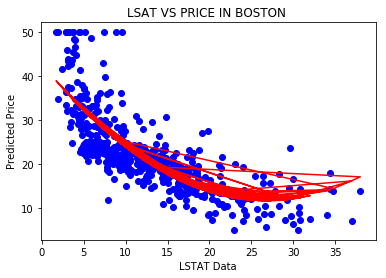

In [172]:
polreg(2)


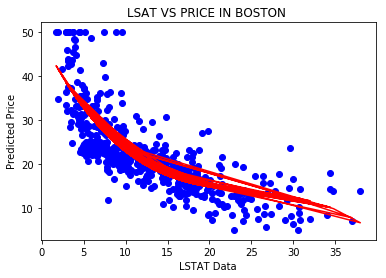

In [173]:
polreg(3)


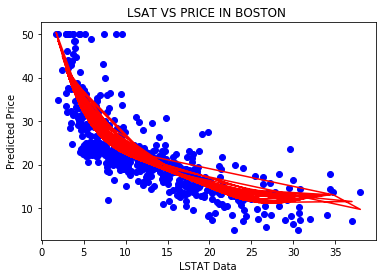

In [174]:
polreg(5)

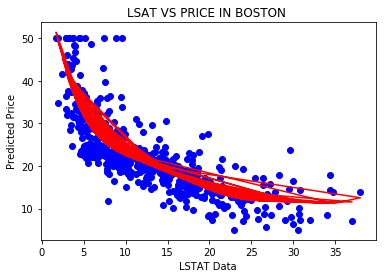

In [175]:
polreg(7)

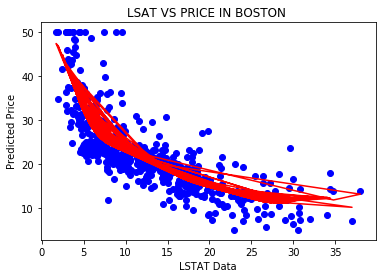

In [176]:
polreg(9)

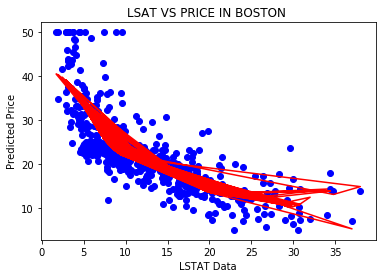

In [177]:
polreg(11)

In [179]:
#calculating accuracy
def polacc(Degree):
    regpoly=PolynomialFeatures(degree=Degree)
    X_poly=regpoly.fit_transform(X)
    reg=LinearRegression().fit(X_poly,y)  
    return(reg.score(X_poly,y)*100)

In [180]:
## VISUALISING THE ACCURACY VS DEGREE OF THIS MODEL
Yacc=[]
Xacc=[]
for i in range(2,15):
    Yacc.append(polacc(i))
    Xacc.append(i)
    
    

Text(0.5, 1.0, 'DEGREE VS ACCURACY')

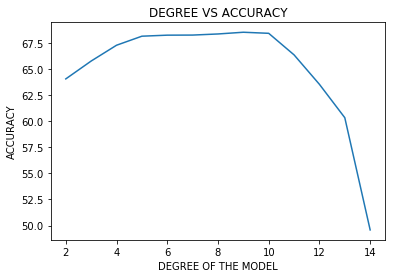

In [181]:
#plotting accuracy vs degree
plt.plot(Xacc,Yacc)
plt.xlabel("DEGREE OF THE MODEL")
plt.ylabel("ACCURACY")
plt.title("DEGREE VS ACCURACY")